## Object recogition

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets.cifar10 import load_data
(X_train, y_train), (X_test, y_test) = load_data()

In [3]:
class_names = [
    "airplane",
    "autmobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "Truck",
    
]

In [4]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [5]:
len(X_train)

50000

In [6]:
len(y_train)

50000

In [7]:
len(X_test)

10000

In [8]:
len(y_test)

10000

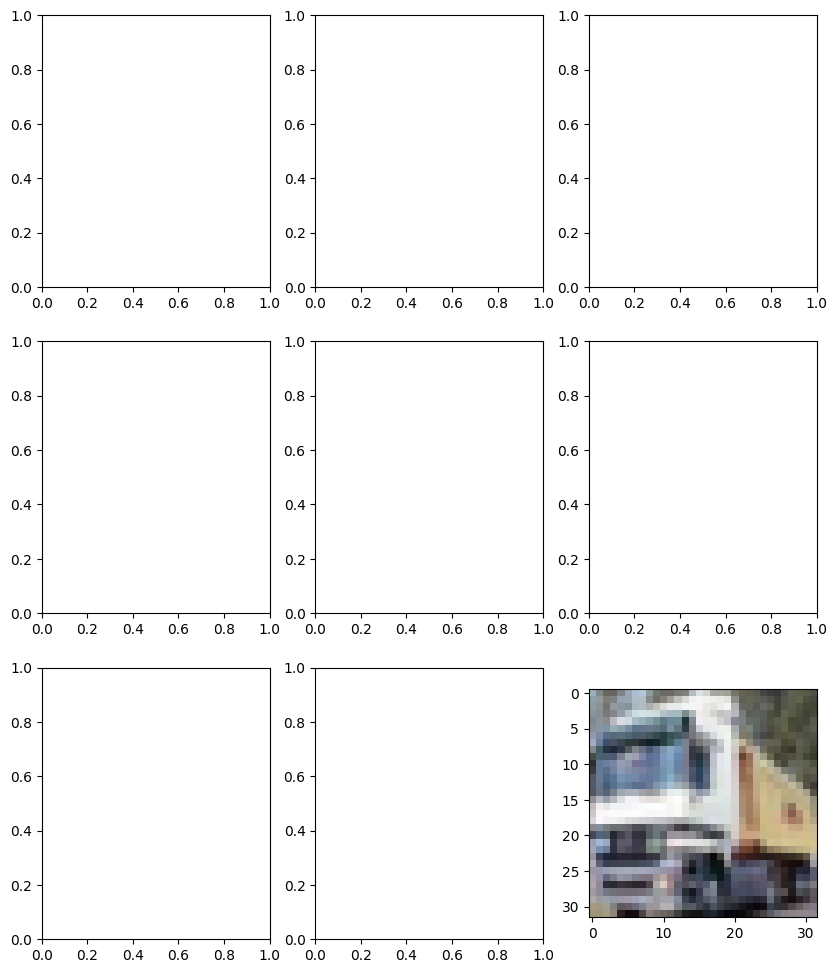

In [16]:
plt.figure(figsize=(10,12))
for i in range(9):
    plt.subplot(3,3, i+1)
    sample_label = X_train[1]
plt.imshow(sample_label)


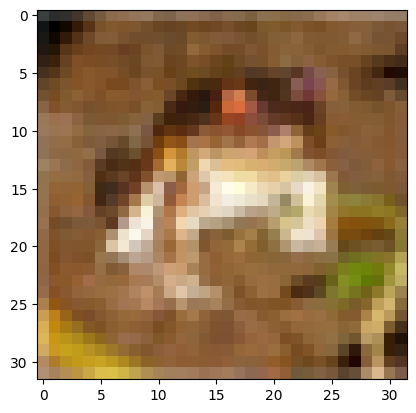

In [9]:
plt.imshow(X_train[0])

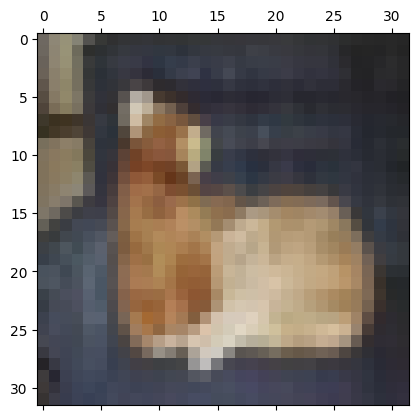

In [ ]:
plt.matshow(X_train[17])

In [ ]:
X_train.shape

(50000, 32, 32, 3)

## Reshaping image data into 28,28

In [ ]:
X_train = X_train.reshape(-1, 32, 32, 3)
X_test = X_test.reshape(-1, 32, 32, 3)

In [ ]:
from tensorflow.image import resize
Xtrain = resize(X_train, [28, 28])
Xtest = resize(X_test, [28, 28])

In [ ]:
Xtrain.shape

TensorShape([50000, 28, 28, 3])

## Defining the data

In [ ]:
inputShape = (28, 28, 3)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1),
          activation = "relu", padding = "valid", input_shape = inputShape))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=(64), kernel_size=(3,3), strides=(1,1),
                                 activation= "relu", padding = "valid", input_shape = inputShape))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

# Add flstten layer
model.add(tf.keras.layers.Flatten())

# Add dense layer with some drop outs
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dropout(rate=0.3))
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dropout(rate=0.3))

# Add output layer
model.add(tf.keras.layers.Dense(10, activation="softmax"))



c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compiling the model

In [ ]:
model.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       409,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 497,610 (1.90 MB)

 Trainable params: 497,610 (1.90 MB)

 Non-trainable params: 0 (0.00 B)

## Training the model

In [ ]:
EPOCHS = 100
Xtrain = Xtrain/255.0
es_callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=2,
                                               restore_best_weights = True)

history = model.fit(Xtrain, y_train, batch_size=32,
                    callbacks = [es_callback],
                    validation_split=0.1, epochs = EPOCHS)

Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.0998 - loss: 2.3029 - val_accuracy: 0.1024 - val_loss: 2.3027
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.1002 - loss: 2.3029 - val_accuracy: 0.0976 - val_loss: 2.3031
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - accuracy: 0.0973 - loss: 2.3028 - val_accuracy: 0.0976 - val_loss: 2.3031


## Evaluating model performance on test set

In [ ]:
Xtest = Xtest/255.0
predictions = model.predict(Xtest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [ ]:
predictions[0]

array([0.08415541, 0.10652421, 0.10210386, 0.11071283, 0.08961052,
       0.10999292, 0.10029683, 0.09303989, 0.13295157, 0.07061199],
      dtype=float32)